## Mt. Etna plumbing system revealed by combined textural, compositional, and thermobarometric studies in clinopyroxenes

Method description: "Pressure and temperature crystallization conditions of cpx were determined for in-equilibrium and re-equilibrated cpx phenocrysts (283 cpx analysis) using the jadeite–diopside/ hedenbergite exchange reactions (Putirka et al. 2003). This model is highly versatile with a standard error of estimate (SEE) of ±33 °C and ±170 MPa and has been applied successfully to numerous studies (Armienti et al. 2007, 2013; Mollo et al. 2011, 2015a; Jeffery et al. 2013). The phenocrysts and whole-rock compositions used for calcula- tion are reported in the Supplementary Table S5. Calcula- tions were performed by using the temperature, calculated with the P- and H2O-independent equation of Putirka et al. (1996), in the barometer of Putirka et al. (2003)." Giacomoni et al., 2016.

I tried to replicate the results using the data reported in the supplementary material:

In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

In [3]:
out=pt.import_Excel('Giacomoni_et_al_2016.xlsx', sheet_name='Table 5')

my_input=out['my_input']
Liqs=out['Liqs']
Cpxs=out['Cpxs']

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We have set Fe3Fet_Liq to zero, as you only entered FeOt. You can input a Fe3FeT_Liq column to specify this value instead


C:\Users\penny\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
a=pt.calculate_Cpx_Liq_Temp(Cpx_Comps=Cpxs, Liq_Comps=Liqs, equationT="T_Put1996_eqT1")-273.15

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


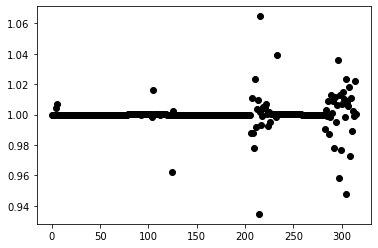

In [15]:
plt.plot(a/my_input['T(C)P-ind'] , 'ok' )

In [19]:
(a/my_input['T(C)P-ind']).to_clipboard(excel=True)

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../..\Thermobar\clinopyroxene_thermobarometry.py:516: UserWarning: Youve selected a P-independent function, so your P input doesnt do anything
  w.warn('Youve selected a P-independent function, so your P input doesnt do anything')


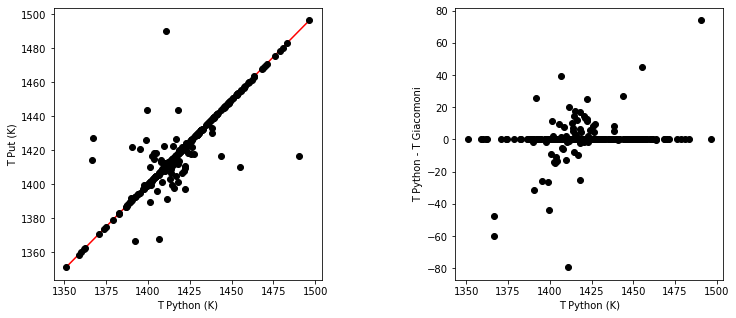

In [21]:
PT_iter = pt.calculate_Cpx_Liq_PT_Iter(Cpx_Comps=Cpxs, Liq_Comps=Liqs, equationP="P_Put1996_eqP1", equationT="T_Put1996_eqT1")

T_G2016 = my_input['T(C)P-ind'] + 273.15
T_py=PT_iter['T_K_calc']
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_G2016), np.max(T_G2016)], [np.min(T_G2016), np.max(T_G2016)], '-r')
ax1.plot(T_py, T_G2016, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_G2016, 'ok')
ax2.set_ylabel('T Python - T Giacomoni')
ax2.set_xlabel('T Python (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)




C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


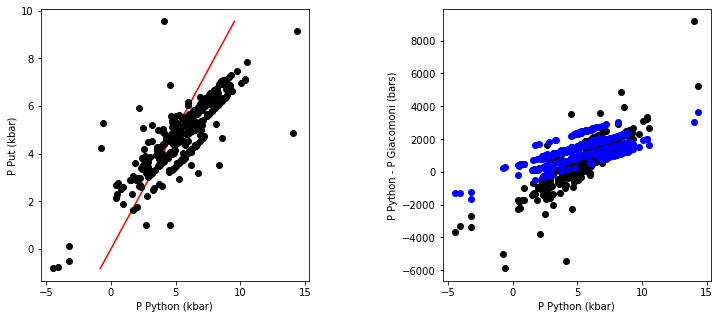

In [23]:
P_G2016 = my_input['P(Kbar)']
P_py = PT_iter['P_kbar_calc']
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_G2016), np.max(P_G2016)], [np.min(P_G2016), np.max(P_G2016)], '-r')
ax1.plot(P_py, P_G2016, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_G2016), 'ok')
ax2.plot(P_py, 1000*(P_py-P_spreadsheet), 'ob')
ax2.set_ylabel('P Python - P Giacomoni (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

In Blue the results I obtained using the spreadsheet. Whit the spreadsheet, I got the same results of Python. 
So there are two options: 
I also tried using other equations, without success. 
What is strange to me is that they fix the water at 1.5 but none of the equation they used are H$_2$O independent.

In [43]:
help(pt.calculate_Cpx_Liq_PT_Iter)

Help on function calculate_Cpx_Liq_PT_Iter in module Thermobar.clinopyroxene_thermobarometry:

calculate_Cpx_Liq_PT_Iter(*, Liq_Comps=None, Cpx_Comps=None, MeltMatch=None, equationP=None, equationT=None, T=None, P=None, iterations=None, Fe3FeT_Liq=None, H2O_Liq=None, T_K_guess=1300, Eq_Tests=False)
     Solves simultaneous equations for temperature and pressure
     using clinopyroxene-liquid thermometers and barometers.
    
    
    Parameters
     -------
    
      Cpx_Comps: DataFrame (opt, either specify Cpx_Comps AND Liq_Comps or MeltMatch)
         Clinopyroxene compositions with column headings SiO2_Cpx, MgO_Cpx etc.
    
     Liq_Comps: DataFrame
         Liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
     Or
    
     MeltMatch: DataFrame
         Combined dataframe of cpx-Liquid compositions
         Used for calculate_Cpx_Liq_PT_melt_matching function.
    
     EquationP: str
         Barometer
         Cpx-Liquid
         |  P_Put1996_eqP1 (T-dep, H

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
